<a href="https://colab.research.google.com/github/Shalini-Mirani/ADSLAB/blob/main/ADSEXP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weather Prediction

##DATASET:- https://www.kaggle.com/datasets/ananthr1/weather-prediction/data

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

####Reading csv

In [ ]:
df=pd.read_csv("/content/seattle-weather.csv")
df.shape

(1461, 6)

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

#EDA

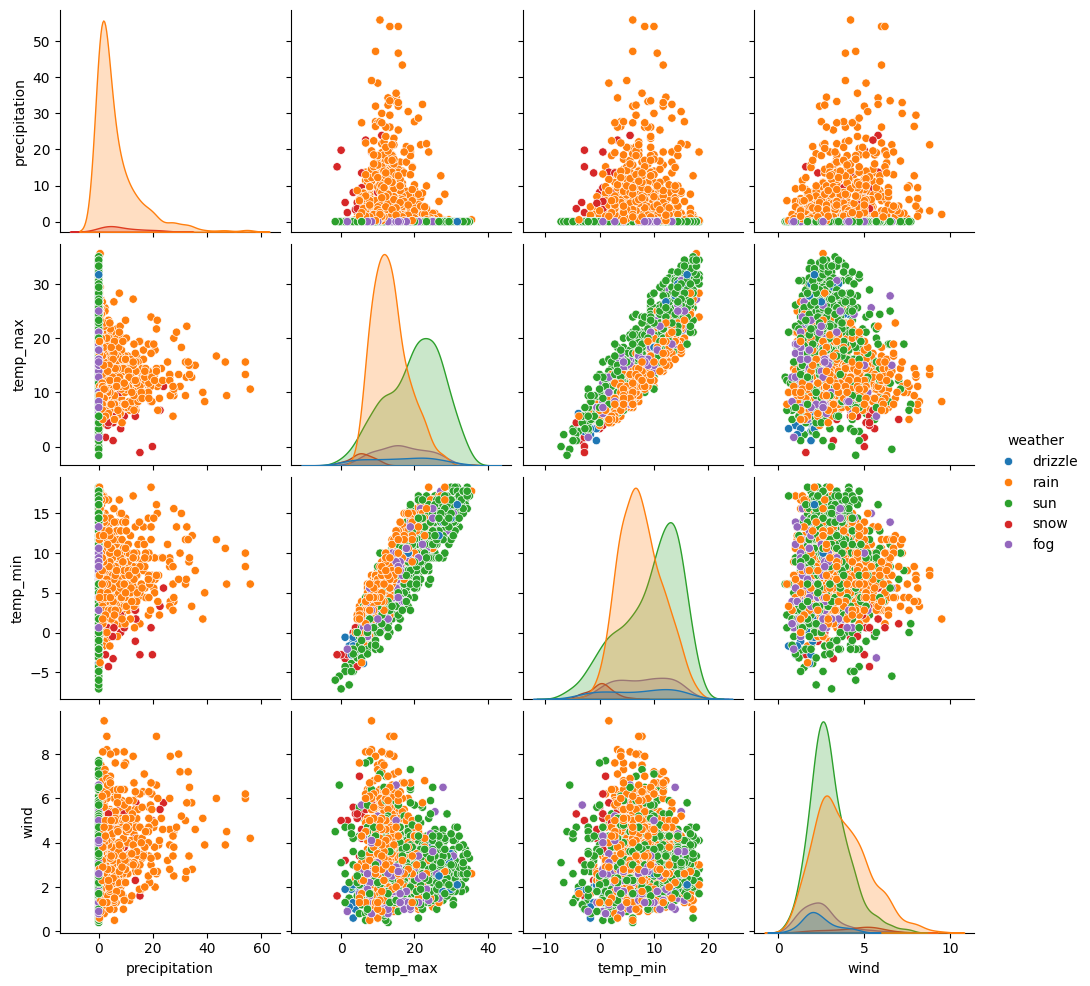

In [ ]:
sns.pairplot(data=df, hue='weather')

<Axes: xlabel='weather', ylabel='count'>

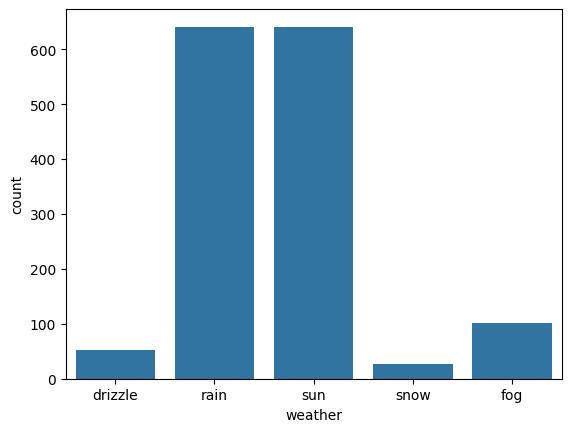

In [ ]:
sns.countplot(data=df, x='weather')

<Figure size 1000x1000 with 0 Axes>

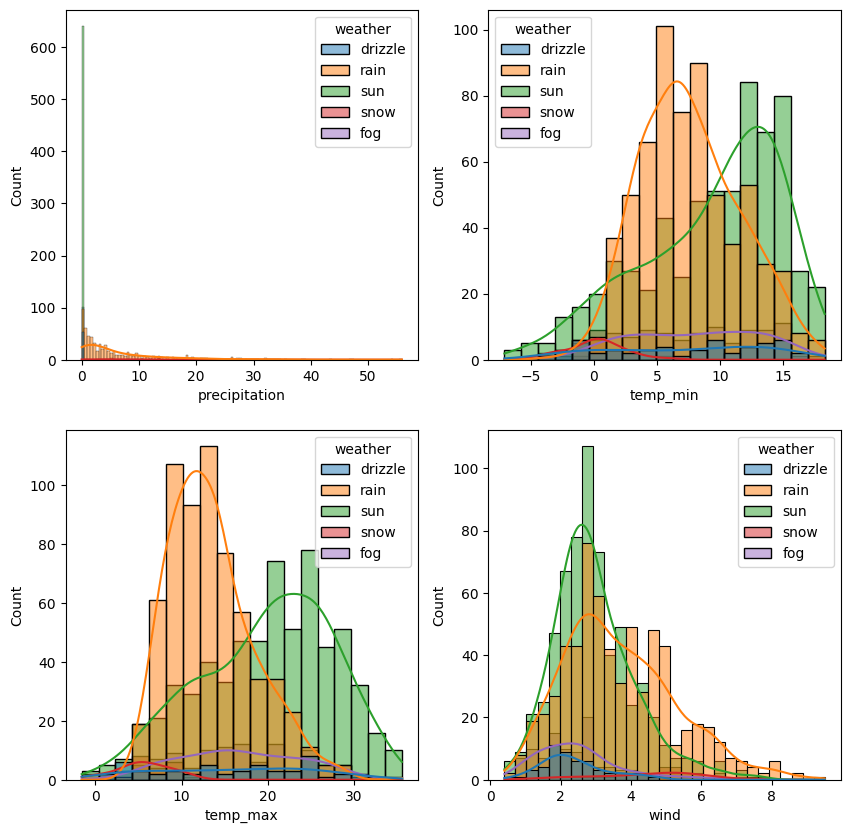

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
fig.clear()
fig,axes = plt.subplots(2,2, figsize=(10,10))
for i in range(4):
    sns.histplot(kde=True, data=df, x=cols[i], hue='weather', ax= axes[i%2, i//2])

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

Text(0.5, 1.0, 'Precipitation Distribution')

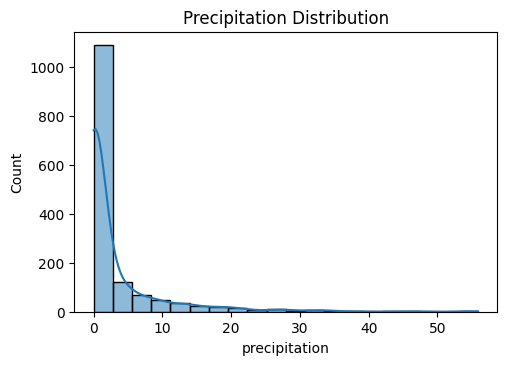

In [ ]:
# EDA - Visualize distributions and relationships
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['precipitation'], bins=20, kde=True)
plt.title('Precipitation Distribution')

Text(0.5, 1.0, 'Temperature Distribution')

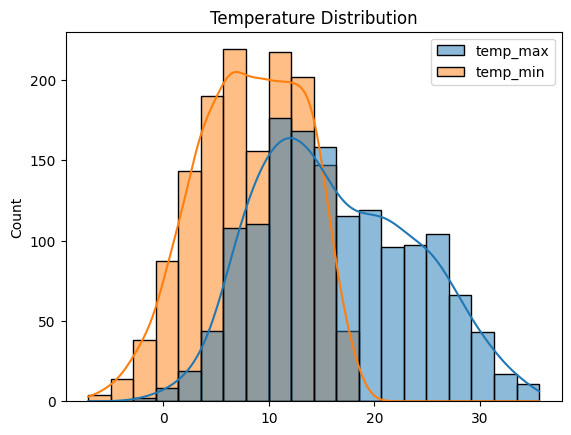

In [ ]:
plt.subplot(1, 1, 1)
sns.histplot(df[['temp_max', 'temp_min']], bins=20, kde=True)
plt.title('Temperature Distribution')

Text(0.5, 1.0, 'Wind Speed Distribution')

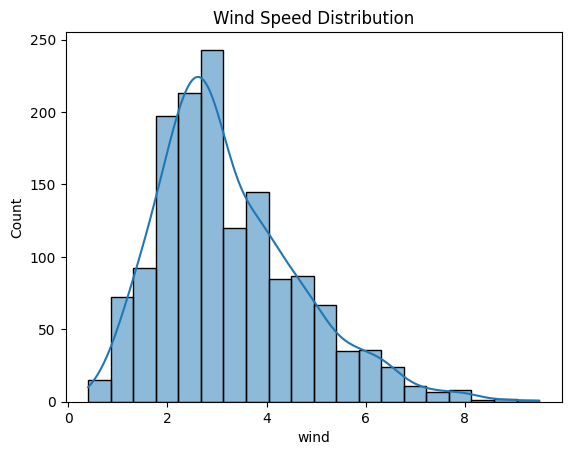

In [ ]:
plt.subplot(1, 1, 1)
sns.histplot(df['wind'], bins=20, kde=True)
plt.title('Wind Speed Distribution')

# Time Series Model

In [ ]:

# Preprocess the data
df.set_index('date', inplace=True)

# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)


# Build ARIMA model

In [ ]:

model = ARIMA(train_data['temp_max'], order=(5,1,0))
arima_model = model.fit()

# Forecast
forecast = arima_model.forecast(steps=len(test_data))

# Evaluate the model

In [ ]:

mae = mean_absolute_error(test_data['temp_max'], forecast)
mse = mean_squared_error(test_data['temp_max'], forecast)
rmse = mean_squared_error(test_data['temp_max'], forecast, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 6.403861555807323
Mean Squared Error (MSE): 61.49593366822107
Root Mean Squared Error (RMSE): 7.8419343065484215


# Plot observed vs forecasted values

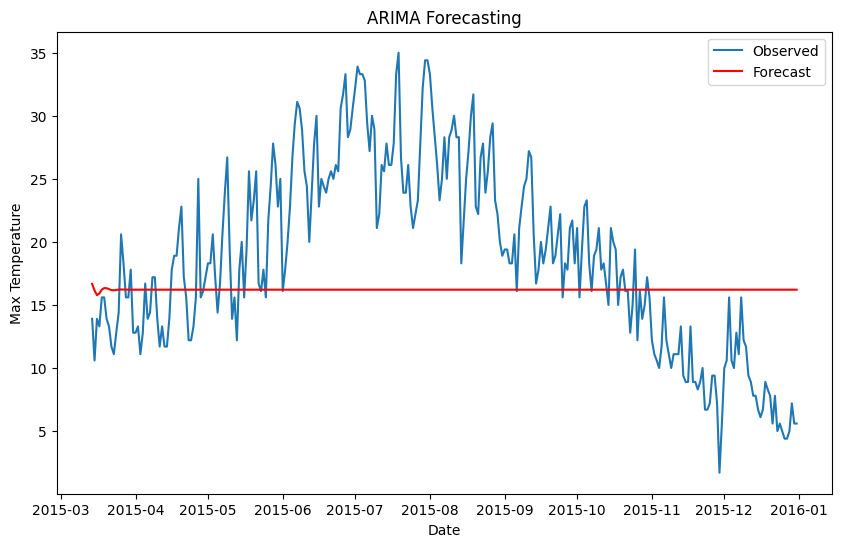

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['temp_max'], label='Observed')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

#### Encode categorical target variable 'weather'

In [ ]:

weather_classes = train_data['weather'].unique()
class_to_index = {cls: idx for idx, cls in enumerate(weather_classes)}
train_data['weather_encoded'] = train_data['weather'].map(class_to_index)
test_data['weather_encoded'] = test_data['weather'].map(class_to_index)

## Train Gradient Boosting model

In [ ]:
gbc=GradientBoostingClassifier()

gbc.fit(train_data.drop(columns=['weather', 'weather_encoded']), train_data['weather_encoded'])
# Forecast weather with Gradient Boosting
gb_forecast_encoded = gbc.predict(test_data.drop(columns=['weather', 'weather_encoded']))
gb_forecast = [weather_classes[idx] for idx in gb_forecast_encoded]

### Plot observed vs forecasted values

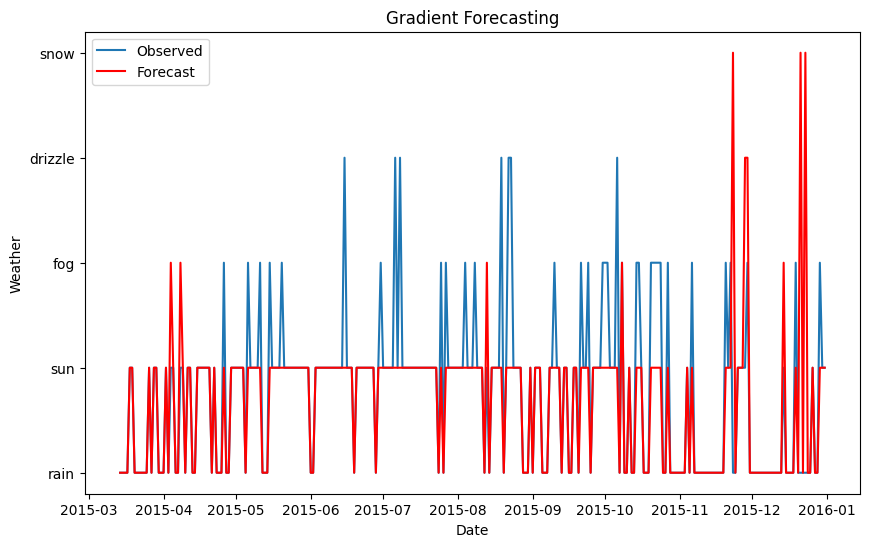

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['weather'], label='Observed')
plt.plot(test_data.index, gb_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Weather')
plt.title('Gradient Forecasting')
plt.legend()
plt.show()

### Evaluate the Gradient Boosting model

In [ ]:

accuracy = accuracy_score(test_data['weather'], gb_forecast)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(test_data['weather'], gb_forecast))

Accuracy: 0.8464163822525598
Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         7
         fog       0.20      0.03      0.06        31
        rain       1.00      0.97      0.99       110
        snow       0.00      0.00      0.00         0
         sun       0.80      0.97      0.87       145

    accuracy                           0.85       293
   macro avg       0.40      0.39      0.38       293
weighted avg       0.79      0.85      0.81       293



#### Scaling the weather variables using label Encoder:

In [ ]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

####Data preprocessing

In [ ]:
# Drop rows with missing or infinite values
df.dropna(inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert DataFrame to integers
x = df.loc[:, df.columns!="weather"].astype(int).values
y = df["weather"].values
df.weather.unique()

array([0, 2, 4, 3, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)


####KNN model

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:76.87%


####SVM model

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:77.55%


####GBC model

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:80.95%


####XGBoost model

In [ ]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:78.23%


# Evaluate the hybrid model(i.e ARIMA and Gbc)

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
input_data = [[1.140175, 8.9, 2.8, 2.469818]]
input_data2 = [[15.6,-1,-2.8,1.6]]
# Make predictions
prediction = gbc.predict(input_data)
prediction2 = gbc.predict(input_data2)
# Combine forecasts using a weighted average
hybrid_forecast = 0.5 * forecast + 0.5 * prediction
hybrid_forecast2 = 0.5 * forecast + 0.5 * prediction2

mae_hybrid = mean_absolute_error(test_data['temp_max'], hybrid_forecast)
mse_hybrid = mean_squared_error(test_data['temp_max'], hybrid_forecast)
rmse_hybrid = mean_squared_error(test_data['temp_max'], hybrid_forecast, squared=False)

print("Hybrid Model Metrics:")
print("Mean Absolute Error (MAE):", mae_hybrid)
print("Mean Squared Error (MSE):", mse_hybrid)
print("Root Mean Squared Error (RMSE):", rmse_hybrid)

mae_hybrid = mean_absolute_error(test_data['temp_max'], hybrid_forecast2)
mse_hybrid = mean_squared_error(test_data['temp_max'], hybrid_forecast2)
rmse_hybrid = mean_squared_error(test_data['temp_max'], hybrid_forecast2, squared=False)

print("Hybrid Model Metrics:")
print("Mean Absolute Error (MAE):", mae_hybrid)
print("Mean Squared Error (MSE):", mse_hybrid)
print("Root Mean Squared Error (RMSE):", rmse_hybrid)


Hybrid Model Metrics:
Mean Absolute Error (MAE): 10.203276094614328
Mean Squared Error (MSE): 148.90271817729945
Root Mean Squared Error (RMSE): 12.202570146378976
Hybrid Model Metrics:
Mean Absolute Error (MAE): 9.818119076059078
Mean Squared Error (MSE): 139.44975590011342
Root Mean Squared Error (RMSE): 11.808884617105607


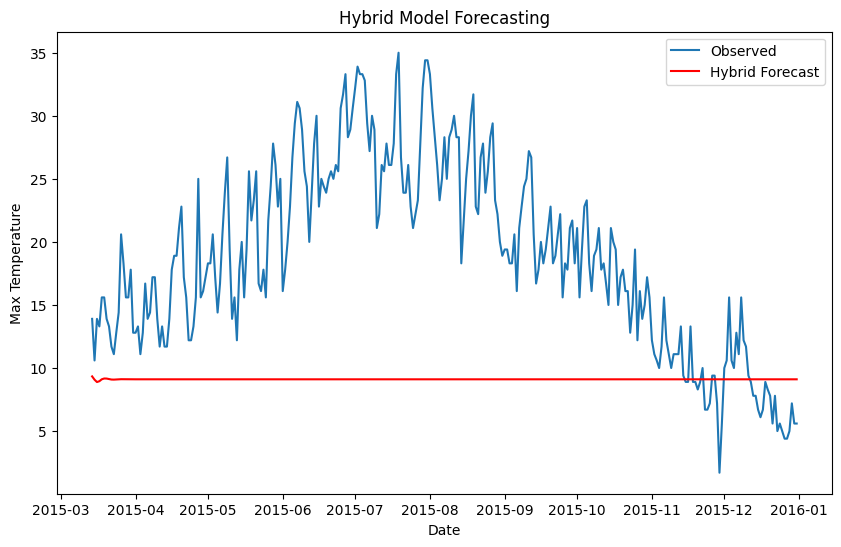

In [ ]:
# Plot observed vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['temp_max'], label='Observed')
plt.plot(test_data.index, hybrid_forecast, label='Hybrid Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Hybrid Model Forecasting')
plt.legend()
plt.show()

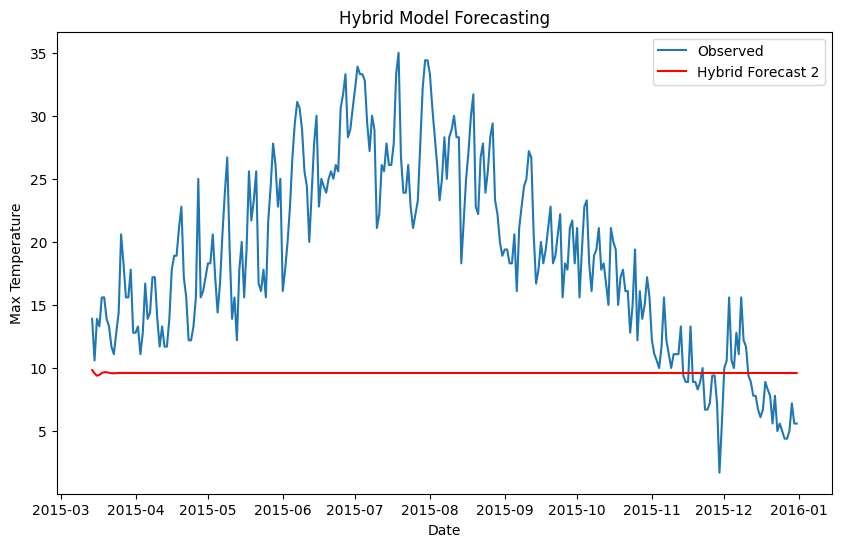

In [ ]:
# Plot observed vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['temp_max'], label='Observed')
plt.plot(test_data.index, hybrid_forecast2, label='Hybrid Forecast 2', color='red')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Hybrid Model Forecasting')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

##Make predictions

In [ ]:
# Input data for prediction
input_data = [[1.140175, 8.9, 2.8, 2.469818]]

# Map predictions to weather conditions
weather_conditions = {0: "Drizzle", 1: "Fog", 2: "Rain", 3: "Snow", 4: "Sun"}

# Print the predicted weather
print("The weather is:", weather_conditions[prediction[0]])


The weather is: Rain


In [ ]:
input_data2 = [[15.6,-1.1,-2.8,1.6]]
# Map predictions to weather conditions
weather_conditions = {0: "Drizzle", 1: "Fog", 2: "Rain", 3: "Snow", 4: "Sun"}

# Print the predicted weather
print("The weather is:", weather_conditions[prediction2[0]])

The weather is: Snow
